***
# Clustering aplicado a Texto
***
* Workshop Text Analytics AFP Crecer
* Mayo 2021
* Lenguaje R

In [2]:
#Deshabilitando mensajes de Warning en R
options(warn=-1)

### Instalación de Paquetes

In [6]:
#Cargando Librerias
options(warn=-1)
install.packages('tm')
install.packages('proxy')
install.packages('ggplot2')
install.packages('wordcloud')
install.packages("ape")
install.packages("ggdendro")

In [7]:
options(warn=-1)
#TM: Paquete diseñado para el manejo de Corpus, en donde un Corpus es una colección de documentos
library('tm')
#PROXY: Paquete utilizado para calculos de distancias y similitudes
library('proxy')
#GGPLOT: Paquete para creación de visualizaciones
library('ggplot2')
#Paquete para la generación de nubes de palabras
library('wordcloud')
#Funcion de Ploteo Arboles Filogeneticos (Grafica de relaciones entre terminos)
library("ape")
#Para manejo de Dendrogramas
library("ggdendro")

### Cargando Archivo Local

In [8]:
#Cargando Archivo de Texto
ds <- read.csv("D:/ClusterText/ac_data.csv",stringsAsFactors=FALSE)
str(ds)
dim(ds)

#Transformando de Dataframe a Corpus
#Vcorpus indica que es un corpus volatil es decir que solamente esta cargado en memoria
report <- VCorpus(VectorSource(ds$Summary))
report[[3]]$content
report[[300]]$content
print(report)
report

'data.frame':	5268 obs. of  13 variables:
 $ Date        : chr  "09/17/1908" "07/12/1912" "08/06/1913" "09/09/1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a heig"| __truncated__ "First

[1] 5268   13

[1] "The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."

[1] "While cruising at 1,600 feet off New Jersey, strong air currents droped the ship to 700 feet before leveling off.  Before it could regain a safe height, it plummeted into the AtlantiOcean. Decision by the commander to fly into a storm despite the presence of lightning."

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5268


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5268

### Limpiando nuestro Dataset

In [9]:
  #a) Remover signos de puntuación y numeros:
  report <- tm_map(report,removePunctuation)
  report <- tm_map(report, removeNumbers)  
  #b) Convertir todo a minusculas, algunos datos pueden ser KeySensitive
  report <- tm_map(report,content_transformer(tolower))
  #c) Remove “stopwords” (Palabras vacias o que aparentemente no tienen algun significado considerable):
  report <- tm_map(report, removeWords, stopwords("english"))
  #d) Multiples espacios en blanco seran colapsados a uno solo:
  report <- tm_map(report, stripWhitespace)

### Lematizacion:  El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra.

In [10]:
report <- read.csv("D:/ClusterText/report_lemma.csv",stringsAsFactors=FALSE)
report <- VCorpus(VectorSource(report$Summary))

In [11]:
#Estructurando la data por medio de una matriz: document-terms matrix
dtm <- DocumentTermMatrix(report)

In [12]:
#Identificando la frecuencia de cada termino
freq <- colSums(as.matrix(dtm)) 
str(freq)
head(names(freq))
head(freq)

 Named num [1:7823] 1 1 1 15 3 2 2 1 1 1 ...
 - attr(*, "names")= chr [1:7823] "aad" "aaliyah" "ababa" "abandon" ...


[1] "aad"         "aaliyah"     "ababa"       "abandon"     "abandonment"
[6] "abatement"

aad     aaliyah       ababa     abandon abandonment   abatement 
          1           1           1          15           3           2

In [13]:
wf <- data.frame(word=names(freq),freq=freq)
str(wf)
head(wf)

'data.frame':	7823 obs. of  2 variables:
 $ word: Factor w/ 7823 levels "aad","aaliyah",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ freq: num  1 1 1 15 3 2 2 1 1 1 ...


,word,freq
aad,aad,1
aaliyah,aaliyah,1
ababa,ababa,1
abandon,abandon,15
abandonment,abandonment,3
abatement,abatement,2


In [14]:
#Removiendo Terminos irrelevantes
dtm <- DocumentTermMatrix(report,control=list(stopwords=c("aircraft","plane","crash","one","two","cause","make","kill","result","continue","contribute","take","flight","right","due","lead","factor","minute","leave")))

### Sparsity: Ejemplo: Asumamos que hay 1000 documentos y que una palabra aparece 5 veces, la sparsity (dispersión) sera: 1-(5/1000)=1-0.005=0.995=99.5%
### si el umbral de dispersión se establece en 0,90 este término se eliminará ya que su escasez (0,995) es mayor que el límite superior de escasez (0,90).

In [15]:
dtms <- removeSparseTerms(dtm, 0.96)
freq <- colSums(as.matrix(dtms)) 
wf <- data.frame(word=names(freq),freq=freq)

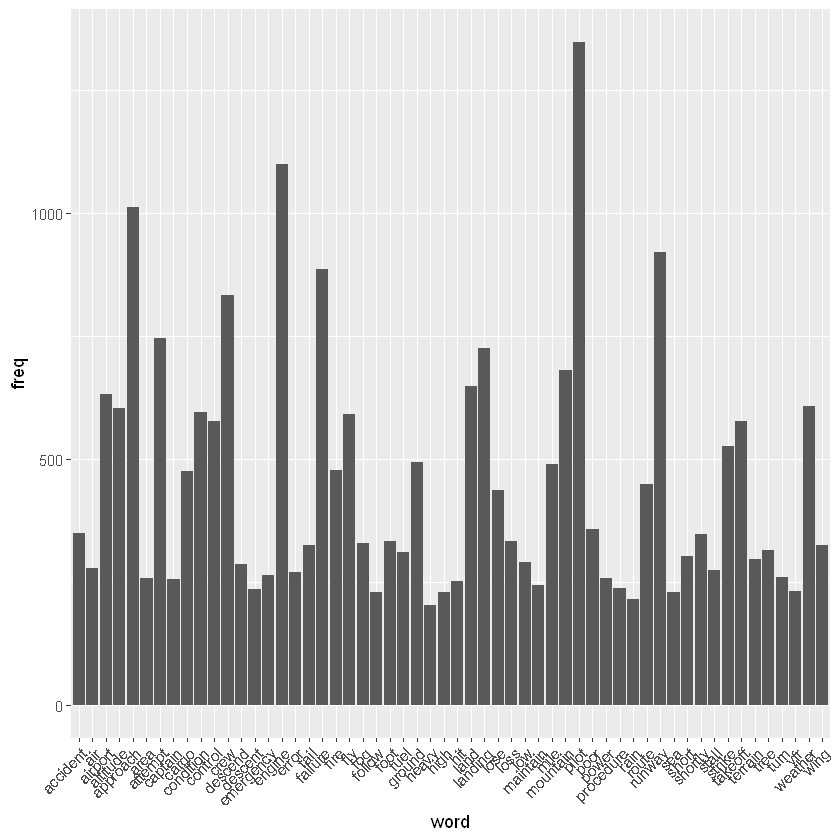

In [16]:
#Construyendo el grafico
p <- ggplot(subset(wf),aes(word, freq))    
p <- p + geom_bar(stat="identity")   
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))   
p

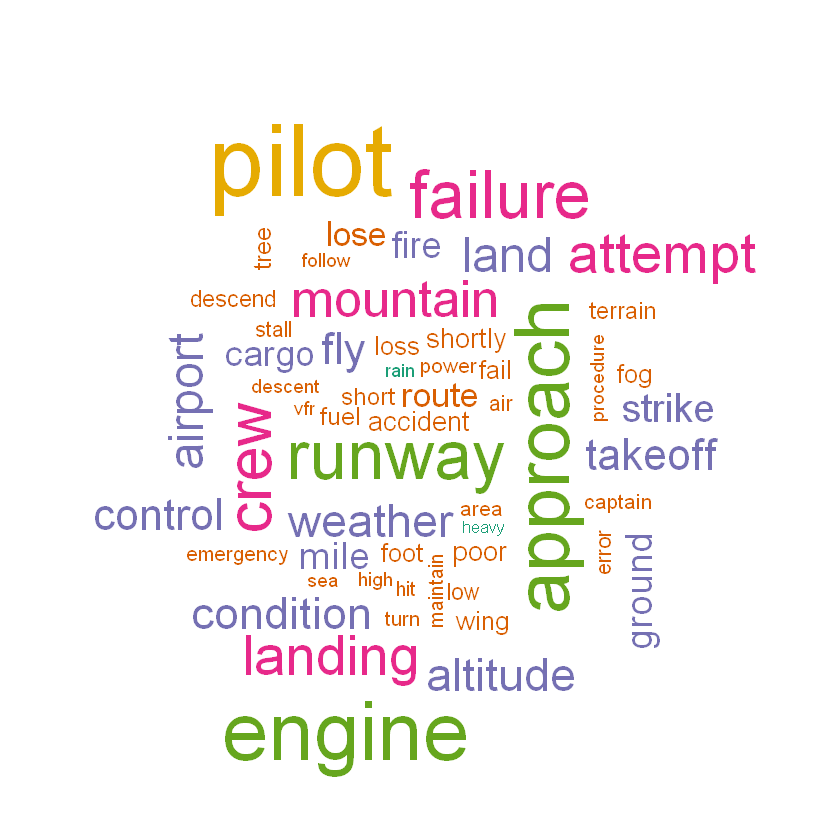

In [17]:
#Creando la nube de palabras
wordcloud(names(freq),freq,scale=c(5,0.1),colors=brewer.pal(6,"Dark2")) 

***
### Clusterizacion basada en la similitud de los terminos
***

In [18]:
#Construyendo Matriz de Distancias
#La distancia de Jaccard mide la disimilitud entre dos conjuntos de muestras y se define como el complemento del coeficiente de Jaccard
dtms[dtms > 1] <- 1

In [19]:
dtms <- as.matrix(dtms)
d <- dist(t(dtms), method = "Jaccard")

### Tecnica Aglomerativa de Clustering,es un acercamiento ascendente: cada observación comienza en su propio grupo, y los pares de grupos son mezclados mientras uno sube en la jerarquía.
### Él Método de Ward es un criterio aplicado al Análisis de clúster jerárquico (Criterio de Varianza Mínima).

In [20]:
hc <- hclust(d,method="ward.D")

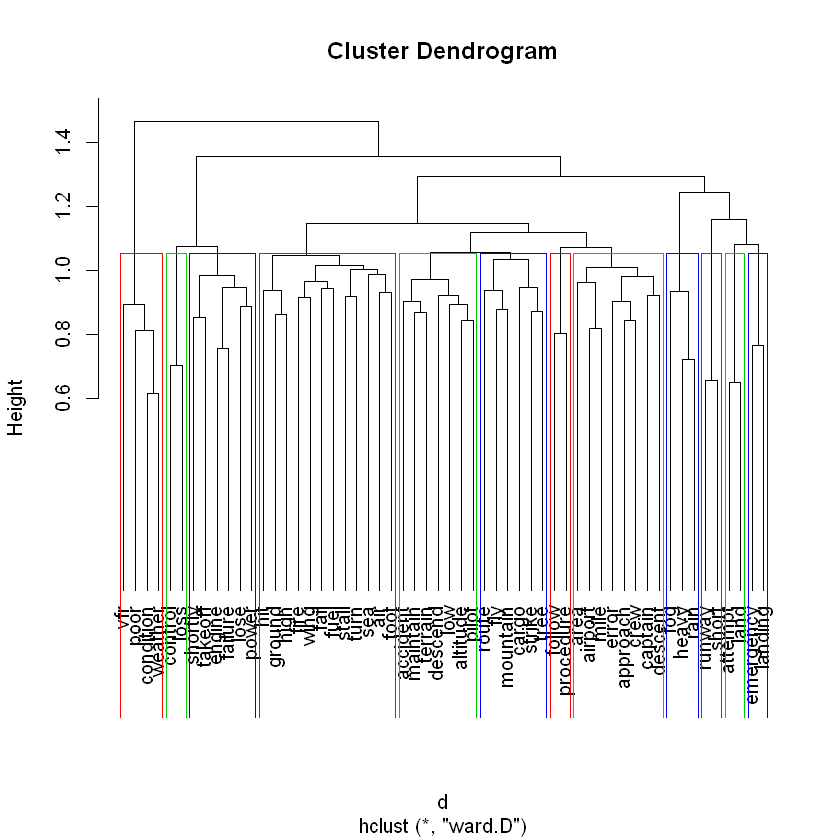

In [21]:
#Visualizando los clusters en 12 grupos
plot(hc,hang=-1)
rect.hclust(hc,k=12,border=2:4)

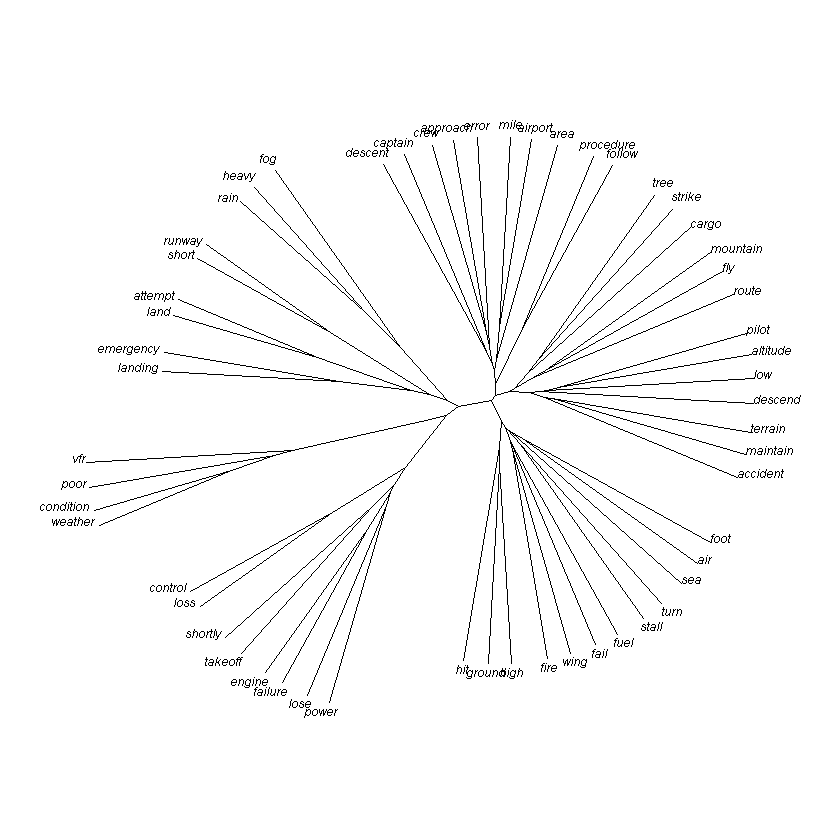

In [23]:
plot(as.phylo(hc), type = "unrooted", cex = 0.6, no.margin = TRUE)

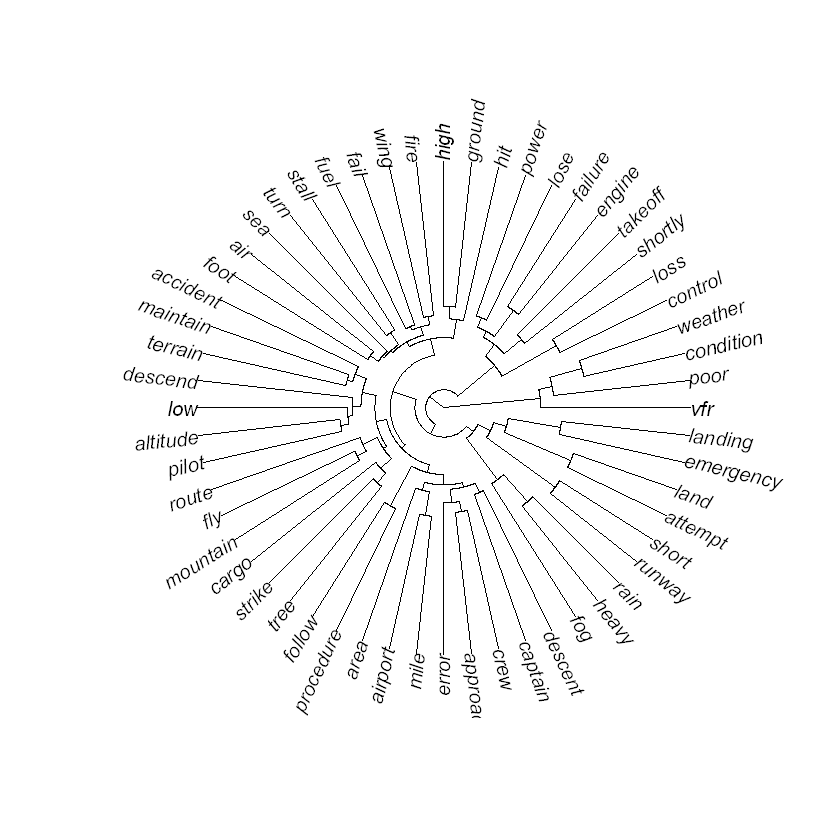

In [24]:
plot(as.phylo(hc), type = "fan")

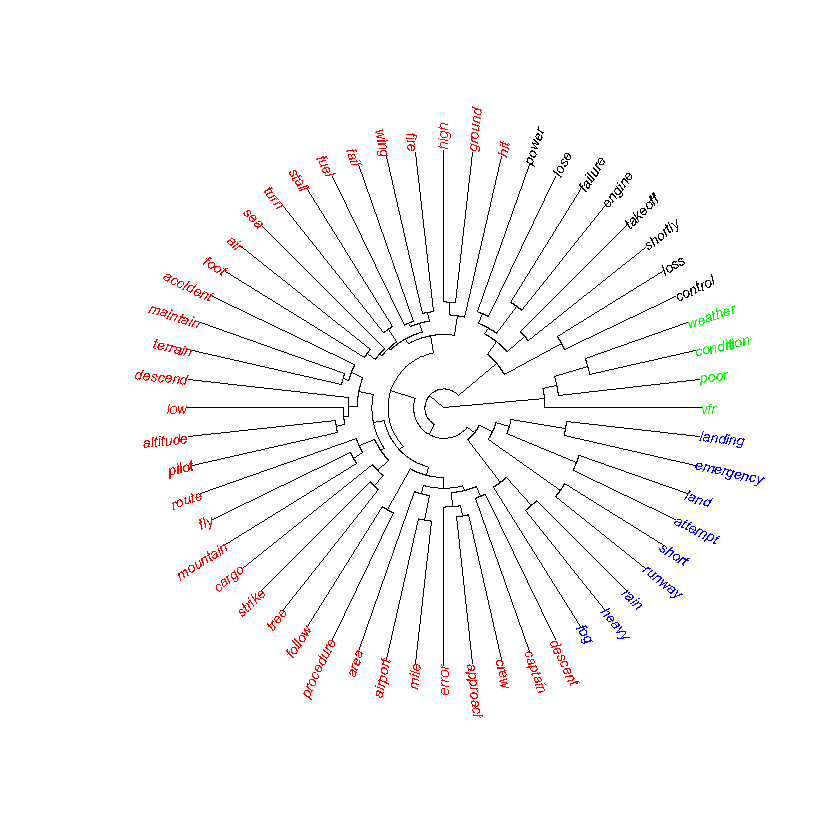

In [25]:
colors = c("red", "blue", "green", "black")
clus4 = cutree(hc, 4)
plot(as.phylo(hc), type = "fan", tip.color = colors[clus4], label.offset = 0, cex = 0.7)

In [26]:
dend <- as.dendrogram(hc)

In [27]:
dend_data <- dendro_data(dend, type = "rectangle")

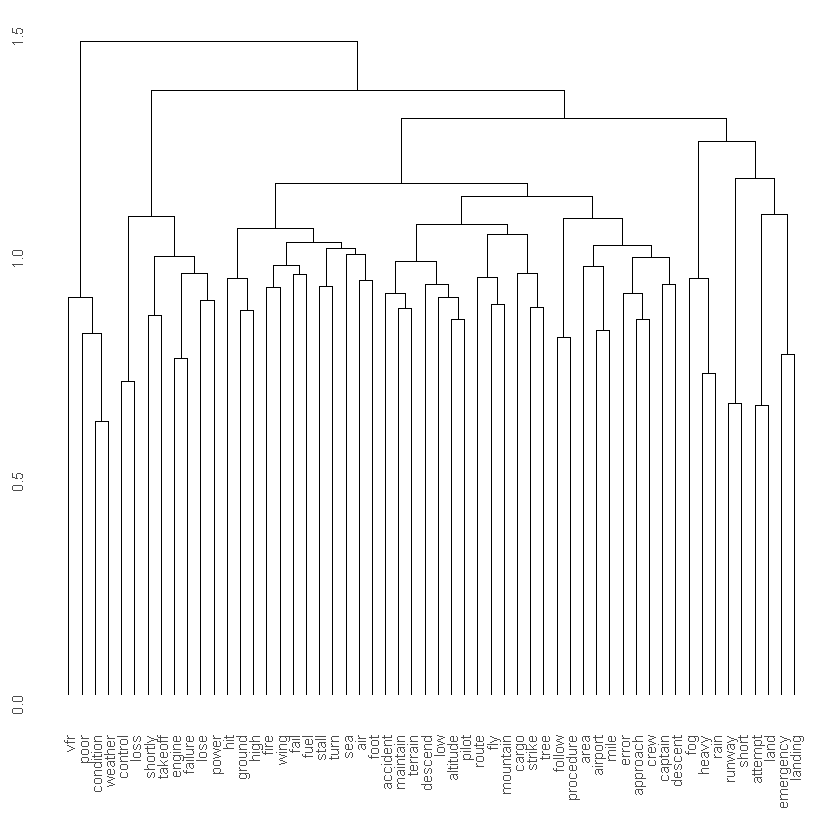

In [28]:
ggdendrogram(hc)

In [29]:
head(dend_data$segments)

x,y,xend,yend
12.38477,1.4668635,1.875,1.4668635
1.87500,1.4668635,1.875,0.8921985
1.87500,0.8921985,1.000,0.8921985
1.00000,0.8921985,1.000,0.0000000
1.87500,0.8921985,2.750,0.8921985
2.75000,0.8921985,2.750,0.8117501


In [30]:
head(dend_data$labels)

x,y,label
1,0,vfr
2,0,poor
3,0,condition
4,0,weather
5,0,control
6,0,loss


### Visualizando Correlaciones entre las palabras

In [31]:
findAssocs(dtm,"weather",corlimit=0.1)

$weather
       adverse      condition           poor            vfr    deteriorate 
          0.53           0.51           0.41           0.33           0.25 
           bad          pilot            fly       marginal       decision 
          0.19           0.17           0.15           0.14           0.13 
       improve        predict          worse    dissipating          genoa 
          0.13           0.13           0.13           0.11           0.11 
       laramie    dangerously disorientation      reception unintelligible 
          0.11           0.10           0.10           0.10           0.10

In [32]:
findAssocs(dtm,"sea",corlimit=0.1)

$sea
            ditch              acme catastrophieffect         columnist 
             0.14              0.13              0.13              0.13 
          cynthia         financial          firewall           forshee 
             0.13              0.13              0.13              0.13 
      gandesberry              host          interval         jackscrew 
             0.13              0.13              0.13              0.13 
             mugu               oti          oversped          stockley 
             0.13              0.13              0.13              0.13 
           thread          vallarta            alaska       lubrication 
             0.13              0.13              0.12              0.12 
    mediterranean               rig              wear           ireland 
             0.12              0.12              0.12              0.11 
            shore               tom          approval 
             0.11              0.11              0.10

In [33]:
findAssocs(dtm,"fog",corlimit=0.1)

$fog
         dense          heavy      overlying           rain     visibility 
          0.21           0.18           0.15           0.15           0.12 
         antao          blues       breakoff          carve        concert 
          0.11           0.11           0.11           0.11           0.11 
        emerge glaciercovered       question            ray            sol 
          0.11           0.11           0.11           0.11           0.11 
     terminate   unrecognized        vaughan          verde        vicente 
          0.11           0.11           0.11           0.11           0.11 
           wsw 
          0.11